#### MARKETPULSE STOCK MARKET TREND ANALYSIS

In [1]:
%reset -f


In [1]:
# INSTALLING BASIC LIBRARIES
%pip install pandas
%pip install numpy 
%pip install scipy 
%pip install matplotlib seaborn scikit-learn ta
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# IMPORTING BASIC LIBRARIES
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import ta                                        # for technical analysis indicators


In [3]:
# loading the data set

stock_prices = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\stock_prices.csv")
stock_P_indicators = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\stock_prices_with_indicators.csv")
comp_Info = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\company_info.csv")
market_indices = pd.read_csv(r"C:\Users\TRIPLE D.TECH\Downloads\Amdari\First Project\market_indices.csv")  




In [4]:
# Verifying data loading

datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Loop through each dataset and display info
for name, df in datasets.items():
    print(f"===== {name} =====")
    print("Shape:", df.shape, "\n")
    
    print("Info:")
    df.info()
    print("\nHead:")
    display(df.head()) 
    print("\n" + "="*60 + "\n")




===== stock_prices =====
Shape: (15600, 8) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          15600 non-null  object 
 1   date            15600 non-null  object 
 2   open            15600 non-null  float64
 3   high            15600 non-null  float64
 4   low             15600 non-null  float64
 5   close           15600 non-null  float64
 6   volume          15600 non-null  int64  
 7   adjusted_close  15600 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 975.1+ KB

Head:


,ticker,date,open,high,low,close,volume,adjusted_close
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177,161.78
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833,167.07
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261,165.68




===== stock_P_indicators =====
Shape: (15502, 31) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            15502 non-null  object 
 1   date              15502 non-null  object 
 2   open              15502 non-null  float64
 3   high              15502 non-null  float64
 4   low               15502 non-null  float64
 5   close             15502 non-null  float64
 6   volume            15502 non-null  float64
 7   adjusted_close    15502 non-null  float64
 8   sma_20            15192 non-null  float64
 9   sma_50            15502 non-null  float64
 10  sma_200           15502 non-null  float64
 11  ema_12            15502 non-null  float64
 12  ema_26            15502 non-null  float64
 13  macd              15191 non-null  float64
 14  macd_signal       15502 non-null  float64
 15  macd_histogram    15502 non

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend




===== comp_Info =====
Shape: (20, 4) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        20 non-null     object
 1   company_name  20 non-null     object
 2   sector        20 non-null     object
 3   ipo_date      20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes

Head:


,ticker,company_name,sector,ipo_date
0,STK001,TechCorp,Technology,2021-04-10
1,STK002,DataSystems,Technology,2016-10-12
2,STK003,CloudNine,Technology,2016-01-18
3,STK004,CyberShield,Technology,2022-02-21
4,STK005,MediPharm,Healthcare,2018-03-05




===== market_indices =====
Shape: (780, 7) 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           780 non-null    object 
 1   sp500_close    780 non-null    float64
 2   nasdaq_close   780 non-null    float64
 3   vix_close      780 non-null    float64
 4   treasury_10y   780 non-null    float64
 5   dollar_index   780 non-null    float64
 6   market_regime  780 non-null    object 
dtypes: float64(5), object(2)
memory usage: 42.8+ KB

Head:


,date,sp500_close,nasdaq_close,vix_close,treasury_10y,dollar_index,market_regime
0,2021-01-04,3891.04,12952.02,20.48,1.496,90.07,bull
1,2021-01-05,3847.20,13116.52,19.89,1.504,90.73,bull
2,2021-01-06,3878.24,12818.48,20.02,1.507,90.46,bull
3,2021-01-07,3803.95,13290.11,19.59,1.498,90.67,bull
4,2021-01-08,3715.64,13365.73,20.14,1.498,90.64,bull


#### *INSIGHT:
##### The following data sets: Stock prices, stock prices with indicators, company info, market Indices have a mismatch in the data types of the ticker,date, ipo_date.
##### - Ticker appear as object rather than strings 
##### - Date also appears as object rather than a date datatype
##### - ipo_date is also an object rather than a date datatype

In [5]:
# Verifying missing values in the data sets
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    print(f"===== {name} =====")
    print("\nMissing Values:")
    display((df.isnull().sum() / len(df) * 100).map(lambda x: f"{x:.2f}%"))


print("\n" + "="*60 + "\n")

===== stock_prices =====

Missing Values:


ticker            0.00%
date              0.00%
open              0.00%
high              0.00%
low               0.00%
close             0.00%
volume            0.00%
adjusted_close    0.00%
dtype: object

===== stock_P_indicators =====

Missing Values:


ticker              0.00%
date                0.00%
open                0.00%
high                0.00%
low                 0.00%
close               0.00%
volume              0.00%
adjusted_close      0.00%
sma_20              2.00%
sma_50              0.00%
sma_200             0.00%
ema_12              0.00%
ema_26              0.00%
macd                2.01%
macd_signal         0.00%
macd_histogram      0.00%
rsi_14              2.13%
bb_middle           0.00%
bb_upper            0.13%
bb_lower            0.13%
bb_width            2.14%
true_range          0.00%
atr_14              0.00%
volume_sma_20       0.00%
volume_ratio        2.00%
momentum_10         1.29%
momentum_20         2.58%
price_to_sma_50     0.00%
volatility_20       0.26%
future_return_5d    0.00%
trend_label         0.00%
dtype: object

===== comp_Info =====

Missing Values:


ticker          0.00%
company_name    0.00%
sector          0.00%
ipo_date        0.00%
dtype: object

===== market_indices =====

Missing Values:


date             0.00%
sp500_close      0.00%
nasdaq_close     0.00%
vix_close        0.00%
treasury_10y     0.00%
dollar_index     0.00%
market_regime    0.00%
dtype: object

##### *INSIGHT: This shows that all other data sets are free of missing values except for the stock prices indicators data set

In [6]:
# Checking for duplicates
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    print(f"===== {name} =====")
    print("\nDuplicate Records:")
    duplicates = df.duplicated().sum()  # counts duplicate rows
    print(f"Total duplicate rows: {duplicates}")
    
    print("\n" + "="*60 + "\n")

===== stock_prices =====

Duplicate Records:
Total duplicate rows: 0


===== stock_P_indicators =====

Duplicate Records:
Total duplicate rows: 0


===== comp_Info =====

Duplicate Records:
Total duplicate rows: 0


===== market_indices =====

Duplicate Records:
Total duplicate rows: 0




#### *INSIGHT: There are no duplicates in any of the data sets.

In [7]:
# Verifying date ranges and continuity in time-series data

# datasets dictionary
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Date columns for each dataset
date_columns = {
    'stock_prices': 'date',
    'stock_P_indicators': 'date',
    'comp_Info': 'ipo_date',        # special column name
    'market_indices': 'date'
}

# Loop through each dataset
for name, df in datasets.items():
    print(f"===== {name} =====")
    
    # Get the correct date column for this dataset
    date_col = date_columns.get(name)
    if date_col not in df.columns:
        print(f"No '{date_col}' column found in this dataset. Skipping continuity check.\n")
        print("="*60 + "\n")
        continue
    
    # Ensure date column is datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Start and end dates
    start_date = df[date_col].min()
    end_date = df[date_col].max()
    print(f"Start date: {start_date}")
    print(f"End date: {end_date}\n")
    
    # Check continuity
    df_sorted = df.sort_values(date_col)
    full_range = pd.date_range(start=start_date, end=end_date, freq='D')  # Change 'D' if not daily
    missing_dates = full_range.difference(df_sorted[date_col])
    
    print(f"Total missing dates: {len(missing_dates)}")
    if len(missing_dates) > 0:
        print("Missing dates:")
        print(missing_dates)
    else:
        print("No missing dates. Continuity is fine.")
    
    print("\n" + "="*60 + "\n")



===== stock_prices =====
Start date: 2021-01-04 00:00:00
End date: 2023-12-29 00:00:00

Total missing dates: 310
Missing dates:
DatetimeIndex(['2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17',
               '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07',
               ...
               '2023-11-25', '2023-11-26', '2023-12-02', '2023-12-03',
               '2023-12-09', '2023-12-10', '2023-12-16', '2023-12-17',
               '2023-12-23', '2023-12-24'],
              dtype='datetime64[ns]', length=310, freq=None)


===== stock_P_indicators =====
Start date: 2021-01-04 00:00:00
End date: 2023-12-25 00:00:00

Total missing dates: 310
Missing dates:
DatetimeIndex(['2021-01-09', '2021-01-10', '2021-01-16', '2021-01-17',
               '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07',
               ...
               '2023-11-25', '2023-11-26', '2023-12-02', '2023-12-03',
          

============================================================================================
##### * Summary findings & Deliverables: Data quality report documenting:
--------------------------------------------------------------------------------------------
●	Missing value percentages per column = Done
●	Data type corrections needed = Ensuring Ticker and date columns to be corrected to reflect their true data types (i.e string and date type)
●	Duplicate records count = No duplicate records found
●	Date range coverage per stock = Missing dates discovered.

---------------------------------------------------------------------------------------------

 #### * Plan for handling issues documented
 --------------------------------------------------------------------------------------------
 ●	Data type corrections needed = Ticker and date columns would be corrected to ensure they reflect their true data types (i.e string and date type)
 
 ●  Missing dates discovered: - i.e either applying Forward fill (ffill) which carries last observation forward (common for financial data).
         or                   -  Backward fill (bfill) method which fills with next available value.

### Data cleaning

##### 1. Converting the date and ticker column to their respective data type: object(string) & datetime

In [8]:
# datasets dictionary
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Date columns for each dataset
date_columns = {
    'stock_prices': 'date',
    'stock_P_indicators': 'date',
    'comp_Info': 'ipo_date',
    'market_indices': 'date'
}

# Looping through each dataset
for name, df in datasets.items():
    print(f"Processing dataset: {name}")
    
    # Convert 'ticker' column to string if it exists
    if 'ticker' in df.columns:
        df['ticker'] = df['ticker'].astype(str)
        print(" - Converted 'ticker' to string")
    
    # Convert date column to datetime
    date_col = date_columns.get(name)
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # 'coerce' converts invalid dates to NaT
        print(f" - Converted '{date_col}' to datetime")
    
    print("\n")


Processing dataset: stock_prices
 - Converted 'ticker' to string
 - Converted 'date' to datetime


Processing dataset: stock_P_indicators
 - Converted 'ticker' to string
 - Converted 'date' to datetime


Processing dataset: comp_Info
 - Converted 'ticker' to string
 - Converted 'ipo_date' to datetime


Processing dataset: market_indices
 - Converted 'date' to datetime




In [9]:
# Confirming the convertion of these columns

# datasets dictionary
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

# Loop through each dataset and show the first 5 rows
for name, df in datasets.items():
    print(f"===== {name} =====")
    display(df.head())
    
    print("\nColumn Data Types:")
    display(df.dtypes)
    
    print("\n" + "="*60 + "\n")


===== stock_prices =====


,ticker,date,open,high,low,close,volume,adjusted_close
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177,161.78
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833,167.07
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261,165.68



Column Data Types:


ticker                    object
date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
adjusted_close           float64
dtype: object



===== stock_P_indicators =====


,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend



Column Data Types:


ticker                      object
date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
adjusted_close             float64
sma_20                     float64
sma_50                     float64
sma_200                    float64
ema_12                     float64
ema_26                     float64
macd                       float64
macd_signal                float64
macd_histogram             float64
rsi_14                     float64
bb_middle                  float64
bb_upper                   float64
bb_lower                   float64
bb_width                   float64
true_range                 float64
atr_14                     float64
volume_sma_20              float64
volume_ratio               float64
momentum_10                float64
momentum_20                float64
price_to_sma_50            float64
volatility_20       



===== comp_Info =====


,ticker,company_name,sector,ipo_date
0,STK001,TechCorp,Technology,2021-04-10
1,STK002,DataSystems,Technology,2016-10-12
2,STK003,CloudNine,Technology,2016-01-18
3,STK004,CyberShield,Technology,2022-02-21
4,STK005,MediPharm,Healthcare,2018-03-05



Column Data Types:


ticker                  object
company_name            object
sector                  object
ipo_date        datetime64[ns]
dtype: object



===== market_indices =====


,date,sp500_close,nasdaq_close,vix_close,treasury_10y,dollar_index,market_regime
0,2021-01-04,3891.04,12952.02,20.48,1.496,90.07,bull
1,2021-01-05,3847.20,13116.52,19.89,1.504,90.73,bull
2,2021-01-06,3878.24,12818.48,20.02,1.507,90.46,bull
3,2021-01-07,3803.95,13290.11,19.59,1.498,90.67,bull
4,2021-01-08,3715.64,13365.73,20.14,1.498,90.64,bull



Column Data Types:


date             datetime64[ns]
sp500_close             float64
nasdaq_close            float64
vix_close               float64
treasury_10y            float64
dollar_index            float64
market_regime            object
dtype: object

##### Handling Missing values in our data sets

In [10]:

datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    # Detect time-series: any datetime column
    is_time_series = any(df[col].dtype == 'datetime64[ns]' for col in df.columns)

    if is_time_series:
        # Forward fill for time-series data
        df.fillna(method='ffill', inplace=True)
        
        # Backward fill for any remaining NaNs
        df.fillna(method='bfill', inplace=True)
        print(f"{name}: Time-series detected, applied ffill then bfill")
    else:
        # Non-time-series: backward fill or drop if minimal
        df.fillna(method='bfill', inplace=True)
        if df.isna().sum().sum() > 0:
            df.dropna(inplace=True)
            print(f"{name}: Non-time-series, bfill applied, remaining NaNs dropped")
        else:
            print(f"{name}: Non-time-series, bfill applied, no NaNs remain")



stock_prices: Time-series detected, applied ffill then bfill
stock_P_indicators: Time-series detected, applied ffill then bfill
comp_Info: Time-series detected, applied ffill then bfill
market_indices: Time-series detected, applied ffill then bfill


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\56525094.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\56525094.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [11]:
# Confirming missing values 
datasets = {
    'stock_prices': stock_prices,
    'stock_P_indicators': stock_P_indicators,
    'comp_Info': comp_Info,
    'market_indices': market_indices
}

for name, df in datasets.items():
    print(f"===== {name} =====")
    print("\nMissing Values:")
    display((df.isnull().sum() / len(df) * 100).map(lambda x: f"{x:.2f}%"))


print("\n" + "="*60 + "\n")

===== stock_prices =====

Missing Values:


ticker            0.00%
date              0.00%
open              0.00%
high              0.00%
low               0.00%
close             0.00%
volume            0.00%
adjusted_close    0.00%
dtype: object

===== stock_P_indicators =====

Missing Values:


ticker              0.00%
date                0.00%
open                0.00%
high                0.00%
low                 0.00%
close               0.00%
volume              0.00%
adjusted_close      0.00%
sma_20              0.00%
sma_50              0.00%
sma_200             0.00%
ema_12              0.00%
ema_26              0.00%
macd                0.00%
macd_signal         0.00%
macd_histogram      0.00%
rsi_14              0.00%
bb_middle           0.00%
bb_upper            0.00%
bb_lower            0.00%
bb_width            0.00%
true_range          0.00%
atr_14              0.00%
volume_sma_20       0.00%
volume_ratio        0.00%
momentum_10         0.00%
momentum_20         0.00%
price_to_sma_50     0.00%
volatility_20       0.00%
future_return_5d    0.00%
trend_label         0.00%
dtype: object

===== comp_Info =====

Missing Values:


ticker          0.00%
company_name    0.00%
sector          0.00%
ipo_date        0.00%
dtype: object

===== market_indices =====

Missing Values:


date             0.00%
sp500_close      0.00%
nasdaq_close     0.00%
vix_close        0.00%
treasury_10y     0.00%
dollar_index     0.00%
market_regime    0.00%
dtype: object

In [12]:
stock_prices.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36


### Exploratory Data Analysis





##### 1. Price Trend Analysis:

In [13]:
# Merging stock price data set with company information on the "ticker" column to include sector data
stock_prices = stock_prices.merge(comp_Info[['ticker', 'sector']], on='ticker', how='left')


In [14]:
stock_prices.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close,sector
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11,Technology
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36,Technology


In [15]:
# Stock selection

sample_stocks = (
    stock_prices.groupby('sector')['ticker']
    .first()  # first stock in each sector
    .head(5)  # pick only 5 sectors                           # Picking one stock from each of 5 different sectors
    .values
)

print(sample_stocks)


['STK013' 'STK017' 'STK009' 'STK005' 'STK001']


In [16]:
# selecting only the rows in stock_prices that belong to the 5 chosen tickers
trend_data = stock_prices[stock_prices['ticker'].isin(sample_stocks)]



In [17]:
trend_data[['sector', 'ticker']].value_counts()

sector      ticker
Consumer    STK013    780
Energy      STK017    780
Finance     STK009    780
Healthcare  STK005    780
Technology  STK001    780
Name: count, dtype: int64

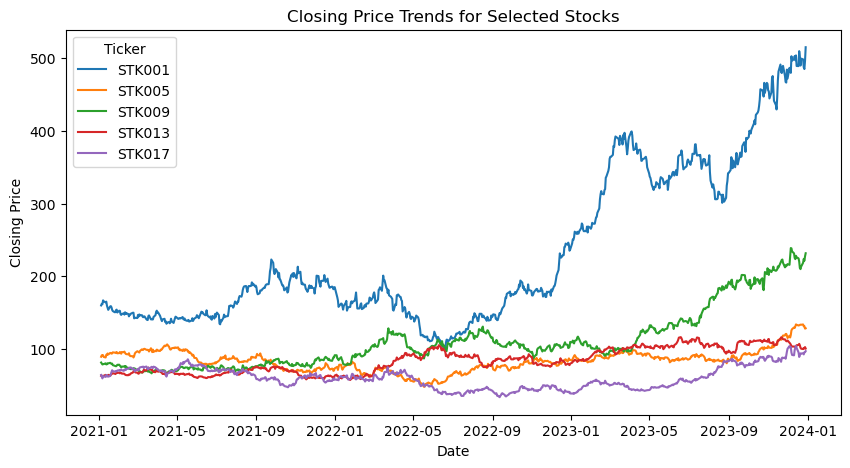

In [18]:
# Plotting closing price trends

plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_data, x='date', y='close', hue='ticker')
plt.title('Closing Price Trends for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')

plt.show()

##### *INSIGHT: 
###### -Stock with ticker STK001(Technology) shows the highest upward trend followed by the stock STK009(Finance).
######  - The ticker STK013(Consumer) exhibits a sideway trend. same as the Healthcare  stock(STK005)
###### - The Energy stock(STK017) however exhibits more of a downward trend over the years.

In [19]:
# Calculating  the basic statistics: mean, median, std dev of returns

# Compute daily returns for each stock
trend_data['daily_return'] = trend_data.groupby('ticker')['close'].pct_change()

# calculate basic statistics for each stock
return_stats = trend_data.groupby(['sector', 'ticker'])['daily_return'].agg(['mean', 'median', 'std']).reset_index()

# Convert mean and std to percentages for readability
return_stats['mean'] = return_stats['mean'] * 100
return_stats['median'] = return_stats['median'] * 100
return_stats['std'] = return_stats['std'] * 100

# Round results
return_stats = return_stats.round(2)

display(return_stats)


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\3027138049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['daily_return'] = trend_data.groupby('ticker')['close'].pct_change()


,sector,ticker,mean,median,std
0,Consumer,STK013,0.08,0.11,1.89
1,Energy,STK017,0.10,0.18,2.96
2,Finance,STK009,0.16,0.16,2.34
3,Healthcare,STK005,0.07,-0.01,2.15
4,Technology,STK001,0.18,0.18,2.45


##### *INSIGHT:
--------------------------------------------------------------------------------------------------------------
###### mean : Shows the average daily return (%) i.e shows the typical daily gain/loss.

###### median:shows the middle daily return (%). 

###### Standard deviation of daily returns (%): i.e measures the volatility — how much the stock price fluctuates daily. Higher values mean more risk.

--------------------------------------------------------------------------------------------------------------
###### - Highest average daily return: Technology (STK001) and Finance (STK009).

###### - Most volatile stock: Energy (STK017) → highest std dev at 2.96%.

###### - Least volatile stock: Consumer (STK013) → lowest std dev at 1.89%.

###### -Healthcare (STK005) had slightly negative median daily returns → suggests more frequent small losses than gains.

------------------------------------------------------------------------------------------------------------------------

#### 2. Sector Comparison

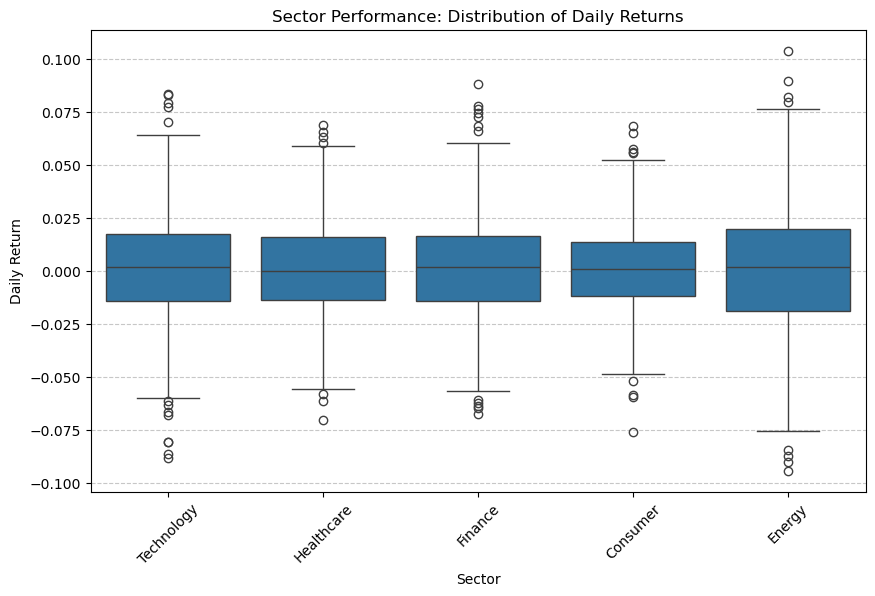

In [20]:
# Visualizing sector performance with box plots

plt.figure(figsize=(10,6))

# Box plot of daily returns by sector
sns.boxplot(data=trend_data, x='sector', y='daily_return')

plt.title('Sector Performance: Distribution of Daily Returns')
plt.xlabel('Sector')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)  # rotate x labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### *INSIGHT:Outliers represent stocks whose returns are far from the typical range in that sector.
##### NB: The Outliers in each sector reveals that some stocks perform better giving higher returns, 
#####  while some perfom badly giving negative returns. The Technology sector for examples as seen above
#####  has most of its stocks giving returns of 2.5%, but some few stocks give returns of above 7.5%, and negative retunrs of -7.5%. 



#### 3.	Volume Analysis

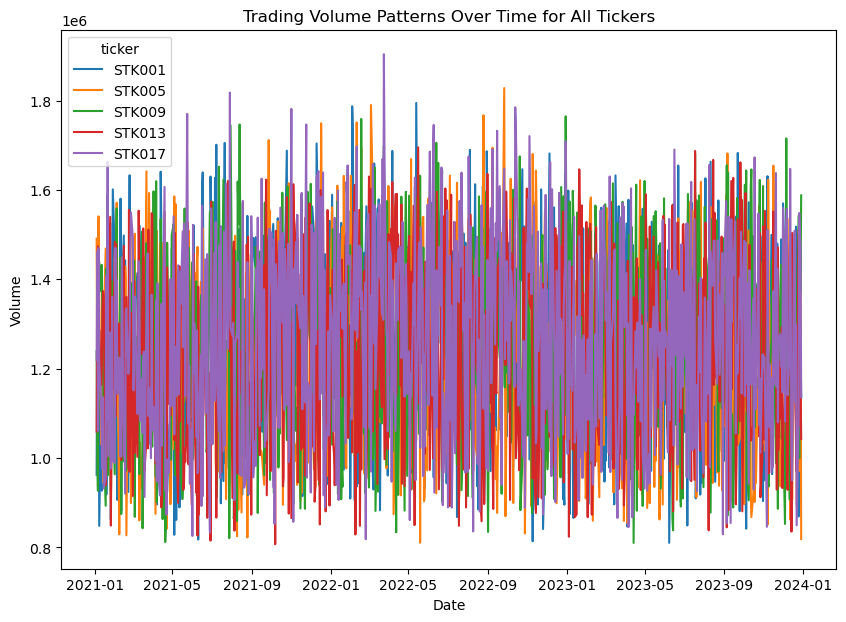

In [21]:
# Plotting volume patterns over time

# Picking the first stock from each sector
sample_stocks_v = stock_prices.groupby('sector')['ticker'].first().values

# Filter data for plotting
volume_data = stock_prices[stock_prices['ticker'].isin(sample_stocks_v)]

plt.figure(figsize=(10, 7))
sns.lineplot(data=volume_data, x='date', y='volume', hue='ticker', legend=True)  
plt.title('Trading Volume Patterns Over Time for All Tickers')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

##### *INSIGHT: This reveals a large clustering around  1.0 to 1.4 million shares implying stocks typically trade around this volume.

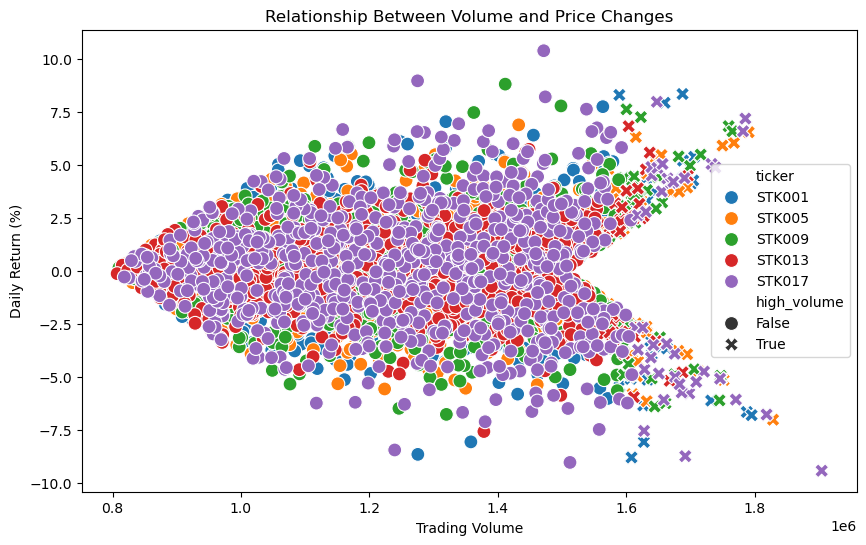

In [22]:

# stock per sector
sample_stocks = stock_prices.groupby('sector')['ticker'].first().values
stock_data = stock_prices[stock_prices['ticker'].isin(sample_stocks)].copy()

# Calculate daily return (%)
stock_data['daily_return'] = stock_data.groupby('ticker')['close'].pct_change() * 100

# Identify high-volume days (top 5% per stock)
stock_data['high_volume'] = stock_data.groupby('ticker')['volume'].transform(
    lambda x: x > x.quantile(0.95)
)


plt.figure(figsize=(10,6))
sns.scatterplot(data=stock_data, x='volume', y='daily_return', hue='ticker', style='high_volume', s=100)
plt.title('Relationship Between Volume and Price Changes')
plt.xlabel('Trading Volume')
plt.ylabel('Daily Return (%)')
plt.show()


###### *INSIGHT: - Most points are clustered around low to moderate trading volumes and small daily returns, implying the “normal” trading days, and small price changes with the trading volume.

In [23]:
# Calculating the correlation between volume and price movement

# Grouping by ticker and calculating the correlation between volume and daily_return
correlations = stock_data.groupby('ticker').apply(
    lambda x: x['volume'].corr(x['daily_return'])
).reset_index()

correlations.columns = ['ticker', 'volume_return_corr']
display(correlations)


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\979449713.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = stock_data.groupby('ticker').apply(


,ticker,volume_return_corr
0,STK001,-0.029889
1,STK005,-0.011901
2,STK009,0.039657
3,STK013,0.020711
4,STK017,-0.048034


##### This generally shows a very weak correlation between the volume and price change

#### 4. Technical Indicator Exploration:



In [24]:
stock_P_indicators.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjusted_close', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26',
       'macd', 'macd_signal', 'macd_histogram', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'bb_width', 'true_range', 'atr_14',
       'volume_sma_20', 'volume_ratio', 'momentum_10', 'momentum_20',
       'price_to_sma_50', 'volatility_20', 'future_return_5d', 'trend_label'],
      dtype='object')

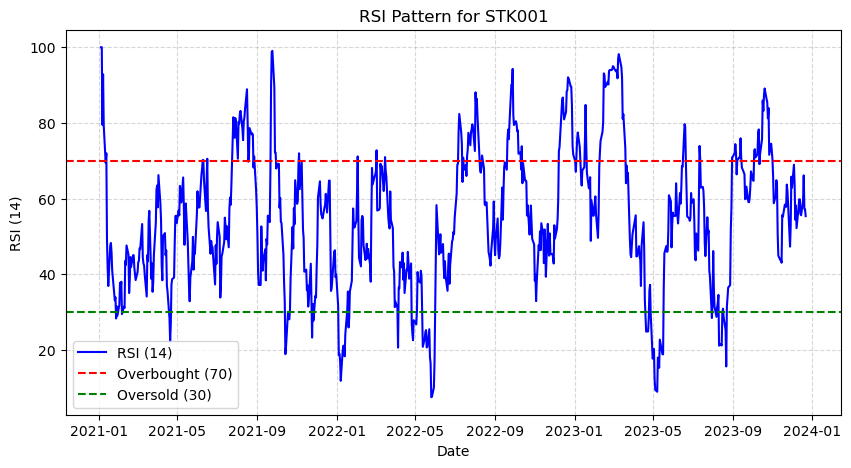

In [25]:
# Visualizing RSI patterns and identifying overbought/oversold conditions

# Choosing a sample ticker to visualize 
chosenRSI_ticker = stock_P_indicators['ticker'].unique()[0]
ticker_df = stock_P_indicators[stock_P_indicators['ticker'] == chosenRSI_ticker]

# Plot RSI pattern
plt.figure(figsize=(10,5))
plt.plot(ticker_df['date'], ticker_df['rsi_14'], label='RSI (14)', color='blue')

# Adding overbought and oversold lines
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Titles and labels
plt.title(f'RSI Pattern for {chosenRSI_ticker}')
plt.xlabel('Date')
plt.ylabel('RSI (14)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



#### *INSIGHT: 
###### * The RSI (blue line) above 70 suggests the stock might be overbought — i.e
######    too many investors have been buying it, pushing the price up to a level that may be unsustainable in the near term.

###### *  The RSI below 30 suggests the stock might be oversold — i.e 
######     too many investors have been selling it, pushing the price below its fair value or creating an opportunity for a potential rebound.

In [26]:

# Pick one ticker to visualize
chosenRSI_ticker = stock_P_indicators['ticker'].unique()[0]
ticker_df = stock_P_indicators[stock_P_indicators['ticker'] == chosenRSI_ticker]

# Calculating MACD and Signal
ticker_df['MACD'] = ticker_df['close'].ewm(span=12, adjust=False).mean() - ticker_df['close'].ewm(span=26, adjust=False).mean()
ticker_df['Signal'] = ticker_df['MACD'].ewm(span=9, adjust=False).mean()

# Identifying crossovers using the 'macd' and 'macd_signal' columns
ticker_df['Bullish'] = (ticker_df['MACD'] > ticker_df['Signal']) & (ticker_df['MACD'].shift(1) <= ticker_df['Signal'].shift(1))
ticker_df['Bearish'] = (ticker_df['MACD'] < ticker_df['Signal']) & (ticker_df['MACD'].shift(1) >= ticker_df['Signal'].shift(1))

C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\486791370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df['MACD'] = ticker_df['close'].ewm(span=12, adjust=False).mean() - ticker_df['close'].ewm(span=26, adjust=False).mean()
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\486791370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_df['Signal'] = ticker_df['MACD'].ewm(span=9, adjust=False).mean()
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\486791370.py:

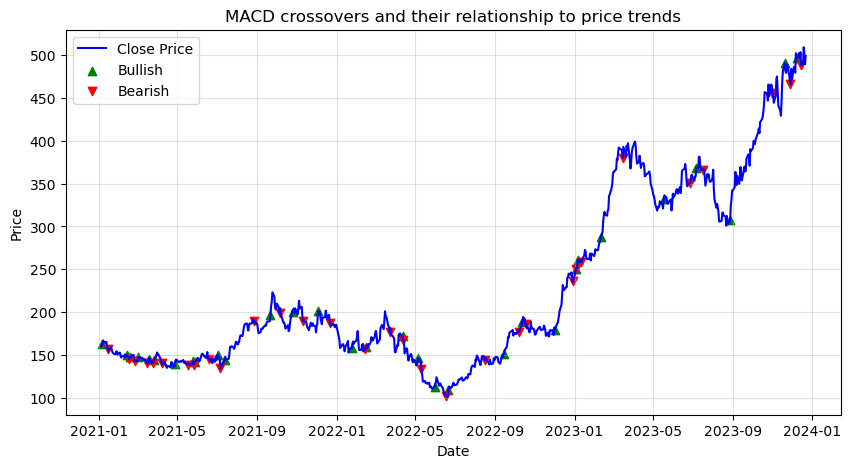

In [27]:
# Plotting MACD crossovers and their relationship to price trends


# Plot
plt.figure(figsize=(10,5))
plt.plot(ticker_df['date'], ticker_df['close'], label='Close Price', color='blue')
plt.scatter(ticker_df[ticker_df['Bullish']]['date'], ticker_df[ticker_df['Bullish']]['close'], color='green', marker='^', label='Bullish')
plt.scatter(ticker_df[ticker_df['Bearish']]['date'], ticker_df[ticker_df['Bearish']]['close'], color='red', marker='v', label='Bearish')
plt.title('MACD crossovers and their relationship to price trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


#### 5.	Correlation Analysis:



In [28]:
stock_P_indicators.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjusted_close', 'sma_20', 'sma_50', 'sma_200', 'ema_12', 'ema_26',
       'macd', 'macd_signal', 'macd_histogram', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'bb_width', 'true_range', 'atr_14',
       'volume_sma_20', 'volume_ratio', 'momentum_10', 'momentum_20',
       'price_to_sma_50', 'volatility_20', 'future_return_5d', 'trend_label'],
      dtype='object')

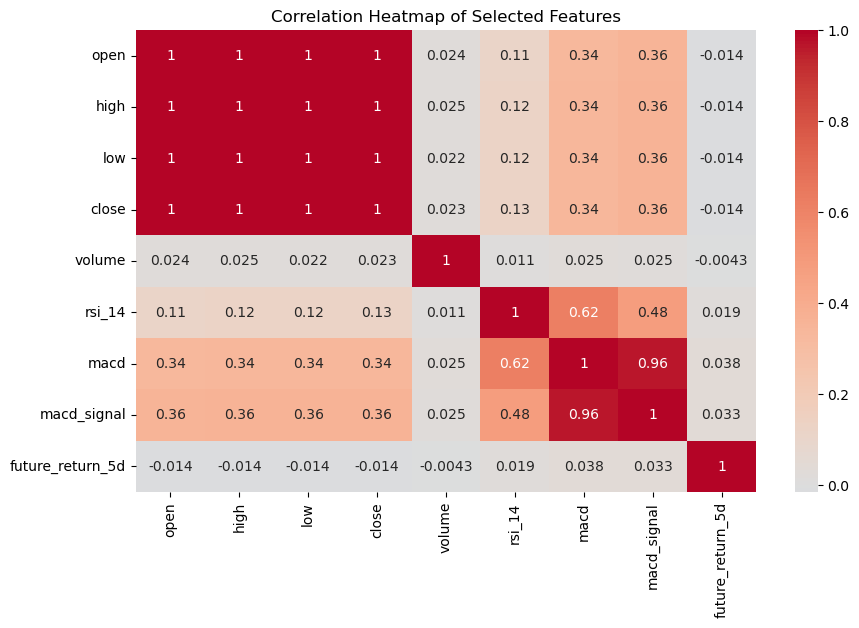

In [69]:

# Selecting some numerical columns of interest
Selected_features = ['open', 'high', 'low', 'close','volume', 'rsi_14', 'macd', 'macd_signal', 'future_return_5d']

# Computing the correlation matrix
corr = stock_P_indicators[Selected_features].corr()

# Ploting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


##### *INSIGHT: 
###### This reveals that every change in one column, for instance ('open', 'high', 'low', 'close),
######    is exactly proportional to changes in the others. For example, if open goes up by 1 unit, high, low, 
###### and close also go up by a fixed amount.

### Feature Selection & Data Preparation

In [30]:
stock_P_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ticker            15502 non-null  object        
 1   date              15502 non-null  datetime64[ns]
 2   open              15502 non-null  float64       
 3   high              15502 non-null  float64       
 4   low               15502 non-null  float64       
 5   close             15502 non-null  float64       
 6   volume            15502 non-null  float64       
 7   adjusted_close    15502 non-null  float64       
 8   sma_20            15502 non-null  float64       
 9   sma_50            15502 non-null  float64       
 10  sma_200           15502 non-null  float64       
 11  ema_12            15502 non-null  float64       
 12  ema_26            15502 non-null  float64       
 13  macd              15502 non-null  float64       
 14  macd_signal       1550

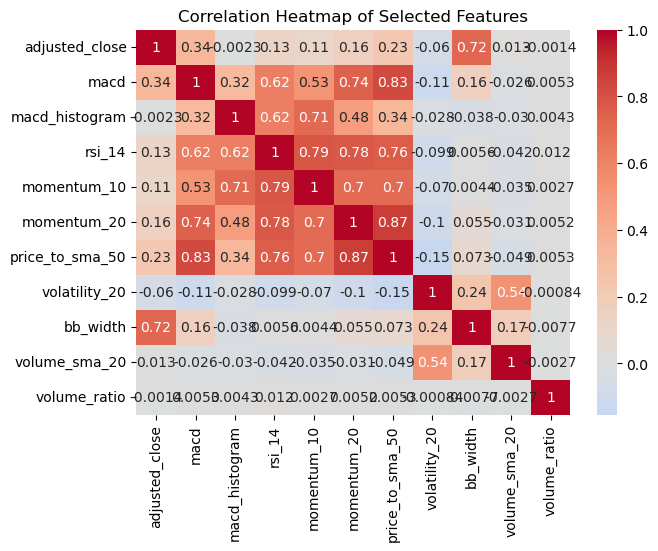

In [31]:
# Confirming which features are highly
confirmation_features = ['adjusted_close','macd', 'macd_histogram', 'rsi_14',
 'momentum_10', 'momentum_20', 'price_to_sma_50',
 'volatility_20', 'bb_width',
 'volume_sma_20', 'volume_ratio'
                          ]


# Computing the correlation matrix
corr = stock_P_indicators[confirmation_features].corr()

# Ploting the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

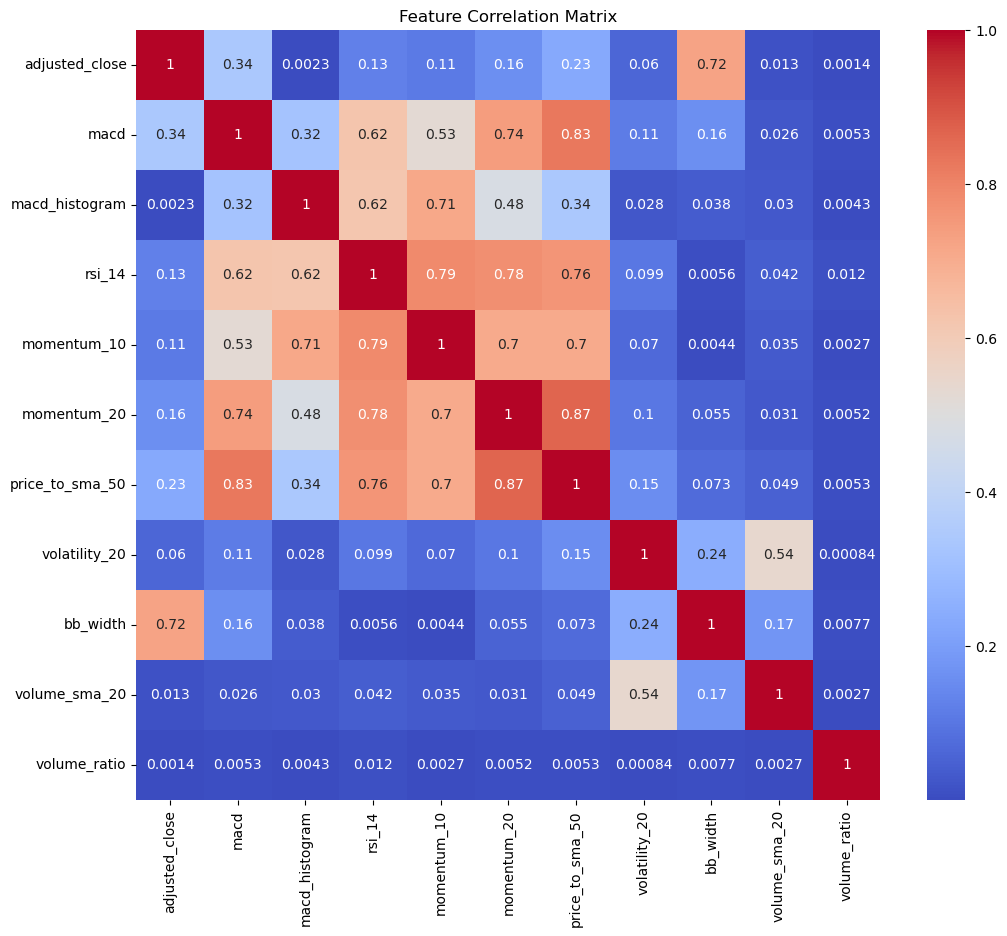

Highly correlated features to consider dropping: []


In [32]:

# Selected features for analysis
features = ['adjusted_close','macd', 'macd_histogram', 'rsi_14',
 'momentum_10', 'momentum_20', 'price_to_sma_50',
 'volatility_20', 'bb_width',
 'volume_sma_20', 'volume_ratio'
                          ]

# Compute correlation matrix
corr_matrix = stock_P_indicators[features].corr().abs()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Highly correlated features to consider dropping:", to_drop)


Highly correlated features have been successfully catered for

In [33]:
stock_P_indicators.head(2)

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110,160.110,...,2.88,2.880,962644.0,1.000000,-0.008557,-0.045594,0.000000,0.012463,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235,161.235,...,5.39,4.135,1137664.5,1.153842,-0.008557,-0.045594,0.006977,0.012463,0.018169,Sideways


In [34]:
stock_P_indicators['trend_label'].dtype

dtype('O')

In [35]:
            # Selecting the recommended features from stock price indicators data set
# Price momentum: momentum_10, momentum_20
# Moving averages: sma_20, sma_50, price_to_sma_50
# Momentum indicators: rsi_14, macd, macd_signal
# Volatility: atr_14, volatility_20, bb_width
# Volume: volume_ratio, obv
# Position: bb_position, stochastic_k

# Defining the selected features
recommended_feature_set = ['adjusted_close','macd', 'macd_histogram', 'rsi_14',
 'momentum_10', 'momentum_20', 'price_to_sma_50',
 'volatility_20', 'bb_width',
 'volume_sma_20', 'volume_ratio'
                          ]

target_variable = 'trend_label'

# Step 2: Keeping only relevant columns and dropping rows with missing target
model_df = stock_P_indicators[['ticker', 'date'] + recommended_feature_set + [target_variable]].copy()
model_df = model_df.dropna(subset=[target_variable])

# Step 3: Sort by date to ensure chronological order
model_df = model_df.sort_values('date')

# Step 4: Split by date (first 70% train, last 30% test)
split_point = int(len(model_df) * 0.7)

train_df = model_df.iloc[:split_point]  # earliest 70% of dates
test_df = model_df.iloc[split_point:]   # latest 30% of dates






In [36]:
# Extracting date-based features 

# Ensuring 'date' is datetime type
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Extracting year, month, day as new features
for df in [train_df, test_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

# Now create X and y
X_train = train_df.drop(['trend_label', 'ticker', 'date'], axis=1)
y_train = train_df['trend_label']

X_test = test_df.drop(['trend_label', 'ticker', 'date'], axis=1)
y_test = test_df['trend_label']




C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\3294241910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['date'] = pd.to_datetime(train_df['date'])
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\3294241910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['date'] = pd.to_datetime(test_df['date'])
C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\3294241910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [43]:
X_train.head(2)

,adjusted_close,macd,macd_histogram,rsi_14,momentum_10,momentum_20,price_to_sma_50,volatility_20,bb_width,volume_sma_20,volume_ratio,year,month,day
0,160.11,0.0,0.0,100.00000,-0.008557,-0.045594,0.0,0.012463,6.363961,962644.0,1.0,2021,1,4
2325,152.00,0.0,0.0,39.99451,0.016815,-0.105324,0.0,0.023564,20.670954,963623.0,1.0,2021,1,4


#### Encoding

Since the X-Train and X-test have columns already in numerical form, we focus then on the y_train instead instead to encode i.e the Target variable

In [44]:
from sklearn.preprocessing import LabelEncoder

# Initializing the encoder
LabelEncoder = LabelEncoder()

# Fit on y_train and transform
y_train_encoded = LabelEncoder.fit_transform(y_train)

# Transform y_test using the same encoder
y_test_encoded = LabelEncoder.transform(y_test)


In [45]:

# Converting to Pandas Series
y_train_encoded = pd.Series(y_train_encoded, name='trend_label')
y_test_encoded = pd.Series(y_test_encoded, name='trend_label')


In [46]:
y_train_encoded.unique()

array([2, 0, 1])

#### Scaling

IndexError: index 9 is out of bounds for axis 0 with size 9

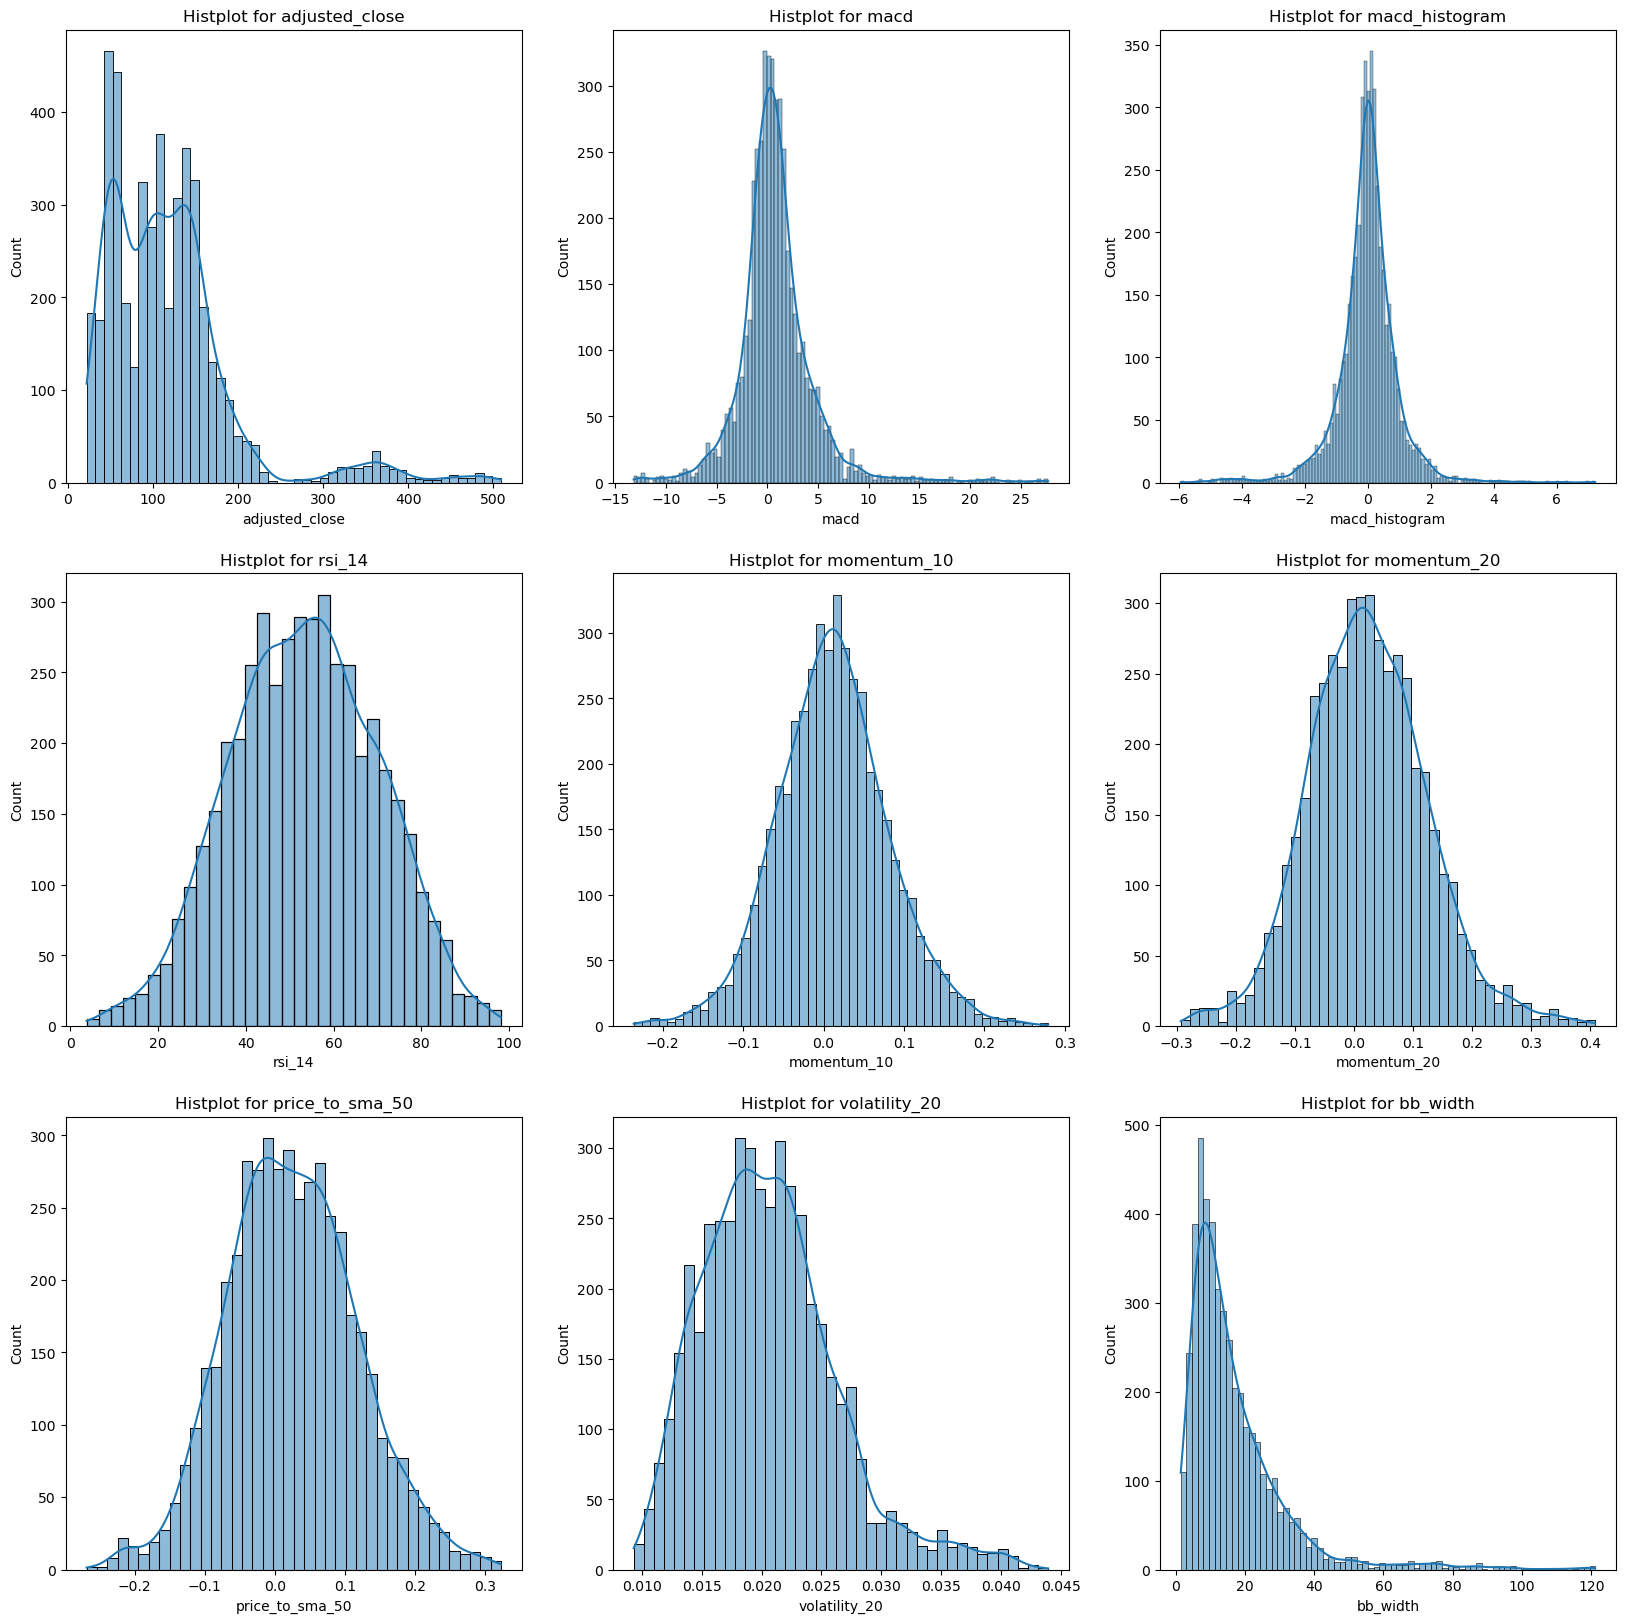

In [47]:
# Confirming the data distribution (x_train) and which sclaler would be appropriate
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
ax=ax.flatten()

for idx, col in enumerate(X_train):
    sns.histplot(df[col], ax=ax[idx], kde=True )
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

Since almost all the features are normally distributed the standard scaler would be appropriate for scaling.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)


In [49]:
# Converting scaled arrays back to DataFrames for easier handling

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [50]:
X_test_scaled.head(2)

,adjusted_close,macd,macd_histogram,rsi_14,momentum_10,momentum_20,price_to_sma_50,volatility_20,bb_width,volume_sma_20,volume_ratio,year,month,day
5967,0.399888,0.098236,0.239255,0.186520,0.673732,0.018918,0.331621,-1.092359,-0.536760,0.609322,0.383552,2.505527,-1.222512,-1.671677
542,3.633608,2.536286,-1.952413,0.488193,-0.188746,0.593948,1.450578,-0.968771,0.220783,-0.414973,0.024071,2.505527,-1.222512,-1.671677


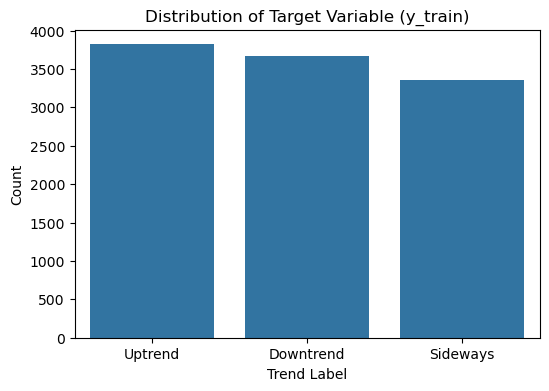

trend_label
Uptrend      3820
Downtrend    3670
Sideways     3361
Name: count, dtype: int64


In [51]:
# Checking the class distribution of the target variable

# Countplot for training target
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)  
plt.title("Distribution of Target Variable (y_train)")
plt.xlabel("Trend Label")
plt.ylabel("Count")
plt.show()

# Optional: check counts numerically
print(y_train.value_counts())


In [52]:
# Compute counts
counts = y_train.value_counts()

# Compute ratios/percentages
ratios = counts / counts.sum()
print("Class counts:\n", counts)
print("\nClass ratios:\n", ratios)


Class counts:
 trend_label
Uptrend      3820
Downtrend    3670
Sideways     3361
Name: count, dtype: int64

Class ratios:
 trend_label
Uptrend      0.352041
Downtrend    0.338218
Sideways     0.309741
Name: count, dtype: float64


###### Rule of Thumb for class imbalance: If its <0.2, then balanced. If >0.2 but <0.3, then slighly balanced. If >0.5, then imbalanced. With our y-train, ratios happen to be <0.3, thus slighly imbalanced.

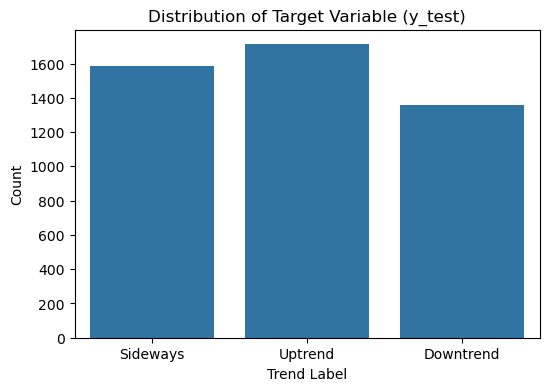

trend_label
Uptrend      1712
Sideways     1583
Downtrend    1356
Name: count, dtype: int64


In [53]:
# Checking the class distribution of the target variable

# Countplot for training target
plt.figure(figsize=(6,4))
sns.countplot(x=y_test)  
plt.title("Distribution of Target Variable (y_test)")
plt.xlabel("Trend Label")
plt.ylabel("Count")
plt.show()

# Optional: check counts numerically
print(y_test.value_counts())



In [54]:
# Compute counts
counts = y_test.value_counts()

# Compute ratios/percentages
ratios = counts / counts.sum()
print("Class counts:\n", counts)
print("\nClass ratios:\n", ratios)

Class counts:
 trend_label
Uptrend      1712
Sideways     1583
Downtrend    1356
Name: count, dtype: int64

Class ratios:
 trend_label
Uptrend      0.368093
Sideways     0.340357
Downtrend    0.291550
Name: count, dtype: float64


###### Rule of Thumb for class imbalance: If its <0.2, then balanced. If >0.2 but <0.3, then slighly balanced. If >0.5, then imbalanced. With our y-train, ratios happen to be <0.3, thus slighly imbalanced.

### Model Selection and Evaluations

In [56]:
# Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the Model - Multiclass logistic regression (since there are more two classes of the target variable)
model = LogisticRegression(max_iter=1000, multi_class='auto', class_weight='balanced')

In [57]:
# Fitting the model on the train data
model.fit(X_train_scaled, y_train_encoded)

C:\Users\TRIPLE D.TECH\Anaconda\envs\Supervised_Learning\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


In [58]:
# Generating predictions on the test data
y_pred = model.predict(X_test_scaled)

#### Evaluating the LogisticRegression Model

Logistic Regression Model's classification report
              precision    recall  f1-score   support

           0       0.45      0.01      0.02      1356
           1       0.39      0.17      0.24      1583
           2       0.37      0.84      0.51      1712

    accuracy                           0.37      4651
   macro avg       0.40      0.34      0.26      4651
weighted avg       0.40      0.37      0.27      4651



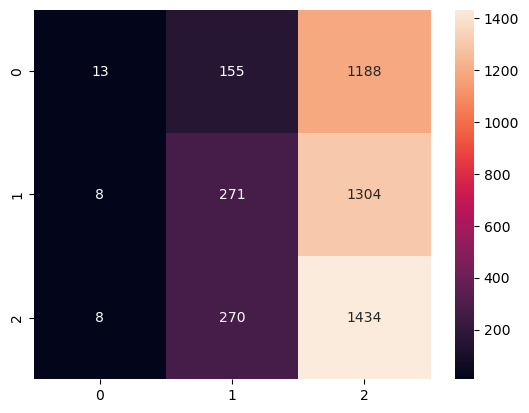

In [59]:
report = classification_report(y_test_encoded, y_pred)
matrix = confusion_matrix(y_test_encoded, y_pred)
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Logistic Regression Model's classification report")
print(report)

sns.heatmap(matrix, annot=True, fmt="g")
plt.show()


INSIGHT:
------------------------------------------------------------------------------------------------
Interpretation: Logistic Regression Model's classification report
              precision    recall  f1-score   support

           0       0.45      0.01      0.02      1356
           1       0.39      0.17      0.24      1583
           2       0.37      0.84      0.51      1712

    accuracy                           0.37      4651
   macro avg       0.40      0.34      0.26      4651
weighted avg       0.40      0.37      0.27      4651

Class 0 (downtrend):
            Precision 0.45 → only 43% of predicted class 0 were correct
            Recall 0.01 → the model almost never correctly identifies true class 0
            F1-score 0.02 → extremely poor performance

Class 1 (sideways):
        Precision 0.39 → 39% of predictions for class 1 were correct
        Recall 0.17 → the model slightly identifies actual class 1 better, but still misses most instances
        F1-score 0.24 → low, 

Class 2 (uptrend):
        Precision 0.37 → 37% of predictions for class 2 were correct
        Recall 0.84 → the model successfully captures most actual class 2 samples
        F1-score 0.51 → moderate performance

Observation:
    Using class_weight='balanced' helped the model detect the minority class (1) better.
    Class 0 remains very difficult to predict.
    Overall, the model is still biased toward class 2, but the macro and weighted F1-scores improved slightly.
    Logistic Regression may be limited for this dataset — more advanced models or better feature engineering are likely needed.

---------------------------------------------------------------------------------------------------------------------------------------------

#### Building more sophisticated models 

### 1. Random Forest Model

Random Forest Model's classification report
              precision    recall  f1-score   support

           0       0.32      0.33      0.33      1356
           1       0.35      0.35      0.35      1583
           2       0.38      0.37      0.37      1712

    accuracy                           0.35      4651
   macro avg       0.35      0.35      0.35      4651
weighted avg       0.35      0.35      0.35      4651

Accuracy on test set: 0.35


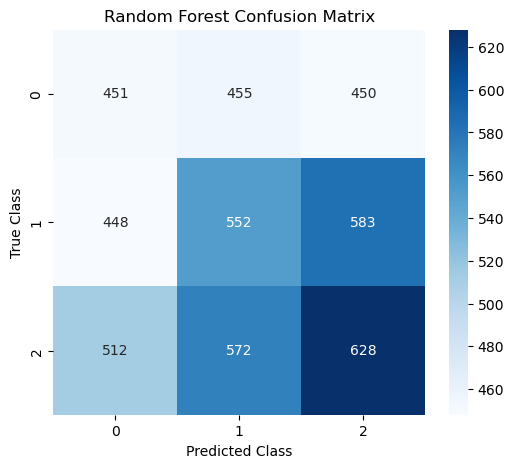

In [60]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    bootstrap=False,
    max_features=None
)


# Fitting model on training data
rf_model.fit(X_train_scaled, y_train_encoded)

# Predicting on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
report_rf = classification_report(y_test_encoded, y_pred_rf)

print("Random Forest Model's classification report")
print(report_rf)

print(f"Accuracy on test set: {accuracy_rf:.2f}")

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(matrix_rf, annot=True, fmt="g", cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Random Forest Confusion Matrix")
plt.show()


#### Hyperparameter Tuning:

Best hyperparameters found:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Model Accuracy after tuning: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.14      0.19      1356
           1       0.38      0.38      0.38      1583
           2       0.36      0.50      0.42      1712

    accuracy                           0.35      4651
   macro avg       0.34      0.34      0.33      4651
weighted avg       0.34      0.35      0.34      4651



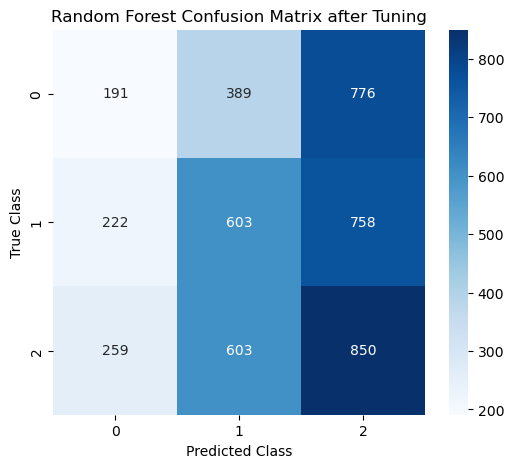

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initializing GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation
    scoring='accuracy',       # optimize for accuracy
    n_jobs=-1                 # use all CPU cores
)

# Fitting on training data
grid_search.fit(X_train_scaled, y_train_encoded)

# Best parameters
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Predicting on test data using best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
report_rf = classification_report(y_test_encoded, y_pred_rf)

print(f"\nRandom Forest Model Accuracy after tuning: {accuracy_rf:.2f}")
print("\nClassification Report:\n", report_rf)

plt.figure(figsize=(6,5))
sns.heatmap(matrix_rf, annot=True, fmt="g", cmap='Blues')
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Random Forest Confusion Matrix after Tuning")
plt.show()


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%pip install xgboost
from xgboost import XGBClassifier

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.3 MB/s eta 0:00:54
   ---------------------------------------- 0.8/72.0 MB 1.1 MB/s eta 0:01:05
    --------------------------------------- 1.0/72.0 MB 1.1 MB/s eta 0:01:08
    --------------------------------------- 1.0/72.0 MB 1.1 MB/s eta 0:01:08
    --------------------------------------- 1.6/72.0 MB 1.1 MB/s eta 0:01:05
    --------------------------------------- 1.6/72.0 MB 1.1 MB/s eta 0:01:05
   - -------------------------------------- 1.8/72.0 MB 1.1 MB/s eta 0:01:06
   - -------------------------------------- 2.1/72.0 MB 1.0 MB/s eta 0:01:07
   - -----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.17      0.22      1356
           1       0.40      0.36      0.38      1583
           2       0.37      0.53      0.43      1712

    accuracy                           0.37      4651
   macro avg       0.35      0.35      0.34      4651
weighted avg       0.36      0.37      0.35      4651



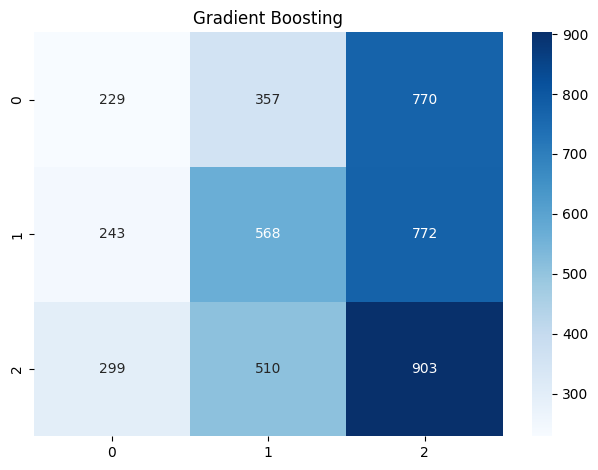

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.15      0.20      1356
           1       0.37      0.08      0.13      1583
           2       0.36      0.78      0.49      1712

    accuracy                           0.36      4651
   macro avg       0.35      0.33      0.27      4651
weighted avg       0.35      0.36      0.28      4651



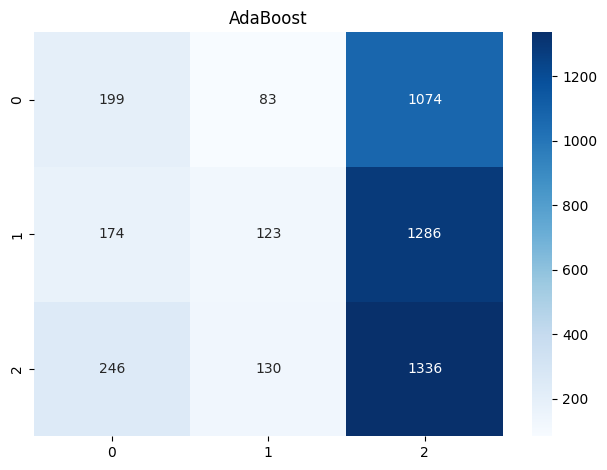

Training SVC...
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.11      0.17      1356
           1       0.36      0.33      0.35      1583
           2       0.37      0.59      0.45      1712

    accuracy                           0.36      4651
   macro avg       0.35      0.34      0.32      4651
weighted avg       0.36      0.36      0.33      4651



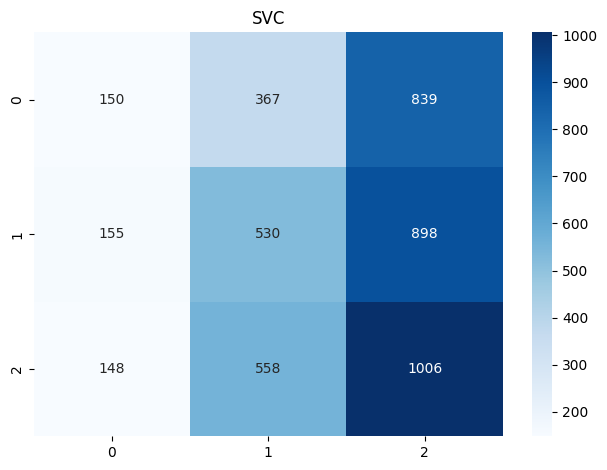

Training KNeighborsClassifier...
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.36      0.32      1356
           1       0.34      0.36      0.35      1583
           2       0.35      0.28      0.31      1712

    accuracy                           0.33      4651
   macro avg       0.33      0.33      0.33      4651
weighted avg       0.33      0.33      0.33      4651



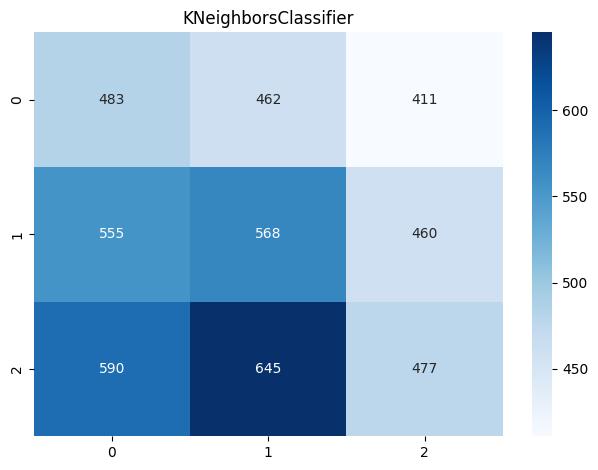

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.33      0.33      1356
           1       0.34      0.34      0.34      1583
           2       0.38      0.38      0.38      1712

    accuracy                           0.35      4651
   macro avg       0.35      0.35      0.35      4651
weighted avg       0.35      0.35      0.35      4651



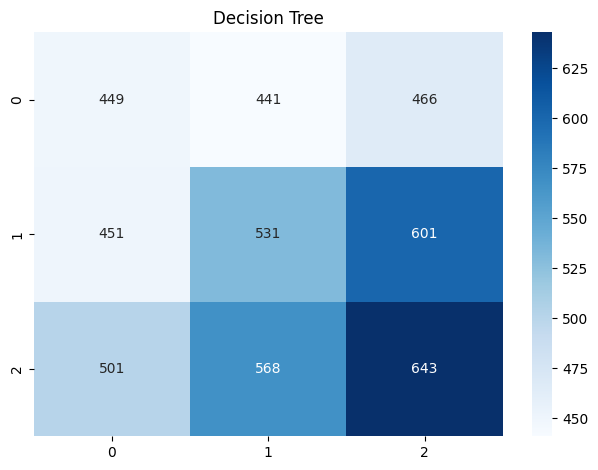

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.36      0.34      1356
           1       0.36      0.30      0.33      1583
           2       0.37      0.39      0.38      1712

    accuracy                           0.35      4651
   macro avg       0.35      0.35      0.35      4651
weighted avg       0.35      0.35      0.35      4651



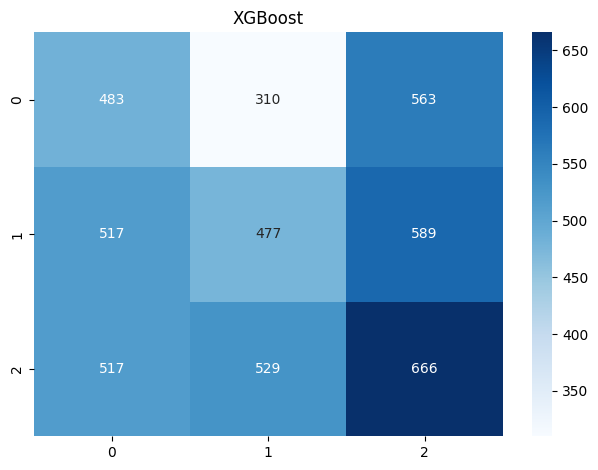

In [110]:
# Getting the visualizations and reports
models = {
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVC': SVC(class_weight='balanced', probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train_encoded)
    
    y_pred = model.predict(X_test_scaled)
    
    report = classification_report(y_test_encoded, y_pred)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    matrix = confusion_matrix(y_test_encoded, y_pred)
    
    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    
    print(f"{model_name} Classification Report:")
    print(report)
    sns.heatmap(matrix, annot=True, fmt="g", cmap="Blues")
    plt.title(f"{model_name}")
    plt.tight_layout()
    plt.show()

            Feature  Importance
7     volatility_20    0.121211
0    adjusted_close    0.102960
9     volume_sma_20    0.082701
1              macd    0.080337
6   price_to_sma_50    0.079228
8          bb_width    0.078595
2    macd_histogram    0.074866
3            rsi_14    0.069816
5       momentum_20    0.069414
4       momentum_10    0.063826
12            month    0.057054
13              day    0.051028
10     volume_ratio    0.049071
11             year    0.019893


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\1314766359.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="cubehelix")


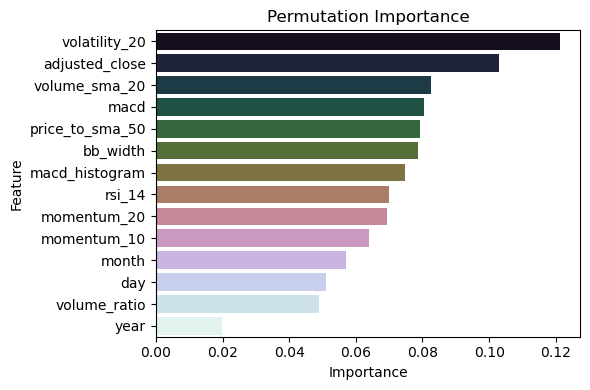

In [74]:
importances = best_rf.feature_importances_  

features = X_train_scaled.columns

feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)



In [64]:
%pip install ydata-profiling

  Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl.metadata (90 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached typeguard-4.4.4-py3-none-any.whl.metadata (3.3 kB)
  Using cached ImageHash-4.3.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached dacite-1.9.2-py3-none-any.whl.metadata (17 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
  Using cached puremagic-1.30-py3-none-any.whl.metadata (5.8 kB)
Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl (398 kB)
Using cached ImageHash-4.3.2-py2.py3-none-any.whl (296 kB)


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_23288\1563065910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="cubehelix")


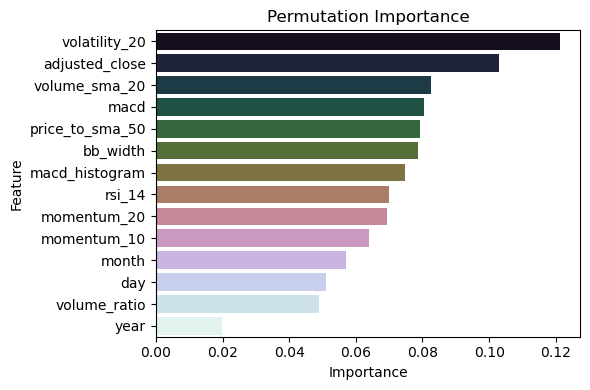

In [75]:
plt.figure(figsize=(6,4))

sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="cubehelix")
plt.title("Permutation Importance")

plt.tight_layout()
plt.show();

In [66]:
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(df, title="Data Quality Report", explorative=True)

# Save as HTML
profile.to_file("data_quality_report.html")

ModuleNotFoundError: No module named 'ydata_profiling'